# Convolutional NN

In [29]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset, summary
from si.util.util import to_categorical

Load the MNIST dataset

In [30]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [31]:
train,test = load_mnist(500)

In [32]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.Y)

In [33]:
preprocess(train)
preprocess(test)

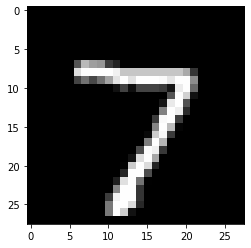

In [34]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [35]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [36]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [37]:
net.fit(train)

ValueError: operands could not be broadcast together with shapes (500,10) (500,) 

In [ ]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])

In [ ]:
conv = net.layers[0]

In [ ]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))